
# <div align="center"> <span style="color: blue;">***Sales Performance Dashboard for Flipkart During Big Billion Days***</span></div>
***

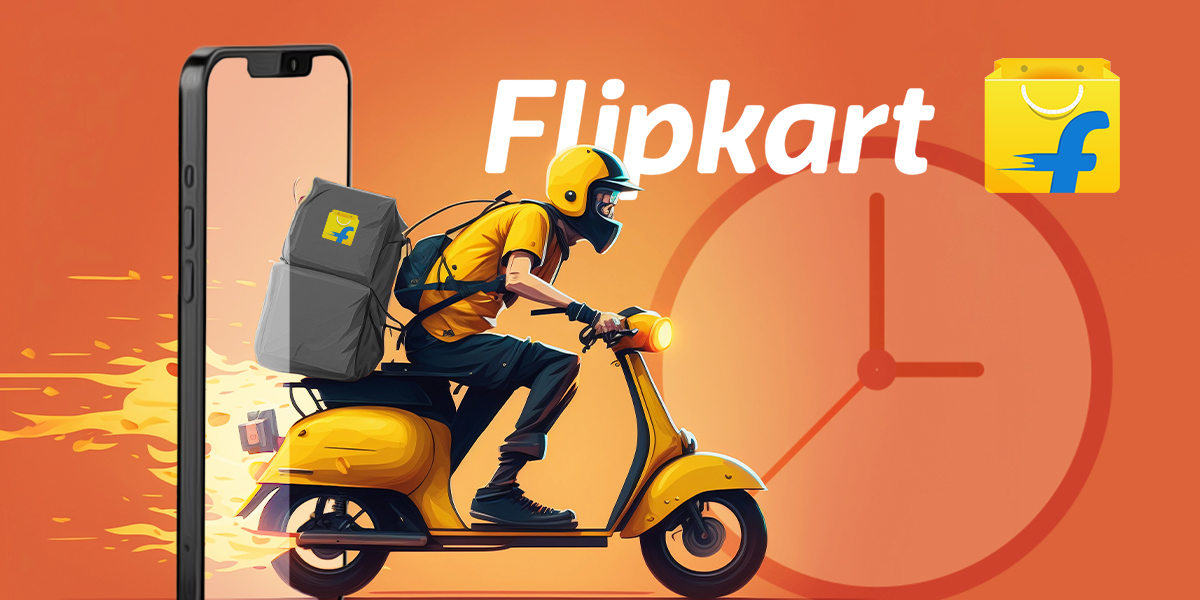

In [3]:
#Creating Synthetic Data for Dashboard
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Set a seed for reproducibility
Faker.seed(0)
np.random.seed(0)

# Number of records for each table
num_customers = 10000
num_products = 500
num_orders = 100000

# Define date range for last 5 years
def random_date(start, end):
    return fake.date_between(start_date=start, end_date=end)

end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)


# 1. Generate Customer Data
customer_ids = [fake.unique.uuid4() for _ in range(num_customers)]
customer_data = {
    "Customer id": customer_ids,
    "Customer name": [fake.name() for _ in range(num_customers)],
    "Email": [fake.email() for _ in range(num_customers)],
    "Phone": [fake.phone_number() for _ in range(num_customers)],
    "Join date": [random_date(start_date, end_date) for _ in range(num_customers)],
    "Age": [random.randint(18, 70) for _ in range(num_customers)],
    "Gender": [random.choice(["Male", "Female"]) for _ in range(num_customers)],
}
customer_df = pd.DataFrame(customer_data)

# 2. Generate Product Data
product_ids = [fake.unique.uuid4() for _ in range(num_products)]
product_data = {
    "Product id": product_ids,
    "Product name": [fake.word().capitalize() for _ in range(num_products)],
    "Category": [random.choice(["Electronics", "Clothing", "Home", "Sports", "Books"]) for _ in range(num_products)],
    "Stock qty": [random.randint(10, 1000) for _ in range(num_products)],
    "Unit price": [round(random.uniform(5.0, 500.0), 2) for _ in range(num_products)],
}
product_df = pd.DataFrame(product_data)


# 3. Generate Sales Data
sales_data = {
    "Order Id": [fake.unique.uuid4() for _ in range(num_orders)],
    "Order date": [random_date(start_date, end_date) for _ in range(num_orders)],
    "Customer id": [random.choice(customer_ids) for _ in range(num_orders)],
    "Product id": [random.choice(product_ids) for _ in range(num_orders)],
    "Qty": [random.randint(1, 20) for _ in range(num_orders)],
}

# Join product data to get the unit price and calculate total sales
sales_df = pd.DataFrame(sales_data)
sales_df = sales_df.merge(product_df[["Product id", "Unit price"]], on="Product id", how="left")
sales_df["Total sales"] = sales_df["Qty"] * sales_df["Unit price"]

# Add random regions
sales_df["Region"] = [random.choice(["North", "South", "East", "West", "Central"]) for _ in range(num_orders)]

# Display the generated data to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Customer Data", dataframe=customer_df)
# tools.display_dataframe_to_user(name="Product Data", dataframe=product_df)
# tools.display_dataframe_to_user(name="Sales Data", dataframe=sales_df)
print(customer_df.head())
print(product_df.head())
print(sales_df.head())



                            Customer id     Customer name  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd        James Mann   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455  Dr. Daniel Sharp   
2  eb1167b3-67a9-4378-bc65-c1e582e2e662   Carlos Williams   
3  f7c1bd87-4da5-4709-9471-3d60c8a70639        Chad Velez   
4  e443df78-9558-467f-9ba9-1faf7a024204       Leah Fisher   

                         Email                 Phone   Join date  Age  Gender  
0        shannon14@example.net    608-507-2079x63811  2021-01-28   44  Female  
1       popeselena@example.net          771.262.2876  2020-03-03   68    Male  
2        eanderson@example.org  +1-469-455-3200x9465  2021-12-09   42    Male  
3  ashleyrodriguez@example.net    (776)524-6732x8832  2023-05-30   58    Male  
4           qbryan@example.net     539-233-8024x8117  2023-01-26   52    Male  
                             Product id Product name  Category  Stock qty  \
0  a4dc432f-707a-4325-881d-429833fe0eb9       Author  Clothing        217   

In [4]:
import os

# Get and print the current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")


Current Directory: C:\Users\USER


In [5]:
# Change the working directory
new_dir = "C:/Users/USER/Desktop/Flipkart"  # Replace with your desired directory path
os.chdir(new_dir)

# Confirm the change
print(f"Changed Directory: {os.getcwd()}")


Changed Directory: C:\Users\USER\Desktop\Flipkart


In [6]:
# Save the Data to CSV Files:
customer_df.to_csv("customer_data.csv", index=False)
product_df.to_csv("product_data.csv", index=False)
sales_df.to_csv("sales_data.csv", index=False)
print("Data has been saved to CSV files.")


Data has been saved to CSV files.


In [7]:
# Merge Sales Data with Customer Data on 'Customer id'
sales_customer_df = sales_df.merge(customer_df, on="Customer id", how="left")

# Merge the result with Product Data on 'Product id'
complete_data = sales_customer_df.merge(product_df, on="Product id", how="left")

# Display the first few rows of the merged data
print(complete_data.head())


                               Order Id  Order date  \
0  5768b0ec-57ce-4fac-82a2-39e2cff1b3f4  2024-03-08   
1  3f293684-fa1c-4921-bed0-c24830acf5a8  2024-06-08   
2  d346b42a-f01a-4183-aeac-77c2e22c6215  2021-11-23   
3  203a8026-48be-44b7-8235-0e7b17f2ea8e  2023-01-30   
4  13de3a85-9c76-4fa2-9a0c-4a400eb420ad  2024-01-03   

                            Customer id                            Product id  \
0  343c02bb-56ff-4ca6-8929-c17291ac5d85  a8e09a62-44e1-4597-8449-5d28a7317875   
1  d663049d-155e-48b1-ba83-ada4a2121ac5  e4a33c00-383c-4ee9-95f5-18cbbecd5d2f   
2  694e0a7a-6900-4272-8cd7-a80dae3c3cfa  5efa9c04-3758-47e3-a217-08253b10ed80   
3  0fdb691b-18d4-40f2-89f3-66b7b3d6ec5f  090f7500-e064-4532-8463-ba9a40e5759a   
4  a5743898-d16c-41da-ac60-131249d283f2  fc8aad73-61a8-4cc8-93ee-a8526aba6b09   

   Qty  Unit price_x  Total sales   Region     Customer name  \
0    5        485.10      2425.50    North        Megan Hunt   
1   15        474.62      7119.30  Central  Caroline C

In [8]:
df=complete_data

In [9]:
df = df.drop('Unit price_y', axis=1)
df.columns

Index(['Order Id', 'Order date', 'Customer id', 'Product id', 'Qty',
       'Unit price_x', 'Total sales', 'Region', 'Customer name', 'Email',
       'Phone', 'Join date', 'Age', 'Gender', 'Product name', 'Category',
       'Stock qty'],
      dtype='object')

In [10]:
df.columns

Index(['Order Id', 'Order date', 'Customer id', 'Product id', 'Qty',
       'Unit price_x', 'Total sales', 'Region', 'Customer name', 'Email',
       'Phone', 'Join date', 'Age', 'Gender', 'Product name', 'Category',
       'Stock qty'],
      dtype='object')

In [11]:
df.to_csv("Flipkart_merged_data.csv", index=False)
print("Merged data has been saved to 'merged_data.csv'.")


Merged data has been saved to 'merged_data.csv'.
